In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

## Data Importing

In [2]:
dataset_path = "./dataset/mobile_offloading_random_data.csv"
dataset = pd.read_csv(dataset_path)
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [3]:
dataset.head()

,Datasize,Bandwidth,computation_capacity_of_the_task_by_UE,Battery_of_UE,Prediction
0,77,96.0,1,1,NO
1,85,98.6,0,1,NO
2,23,98.6,0,0,NO
3,45,102.0,0,1,YES
4,45,103.0,1,1,YES


### Data Preprocessing

In [4]:
def output_value_finder(container):
    output_values = list()
    for items in container:
        if items == "NO":
            output_values.append(0)
        elif items == "YES":
            output_values.append(1)
        else:
            output_values.append(2)
    return output_values

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 5 columns):
Datasize                                  199 non-null int64
Bandwidth                                 199 non-null float64
computation_capacity_of_the_task_by_UE    199 non-null int64
Battery_of_UE                             199 non-null int64
Prediction                                199 non-null object
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [101]:
dataset.describe()

,Datasize,Bandwidth,computation_capacity_of_the_task_by_UE,Battery_of_UE
count,199.000000,199.000000,199.000000,199.000000
mean,44.246231,102.764824,0.582915,0.517588
std,29.818892,3.104016,0.494321,0.500951
min,1.000000,96.000000,0.000000,0.000000
25%,22.000000,100.000000,0.000000,0.000000
50%,40.000000,103.000000,1.000000,1.000000
75%,66.500000,105.000000,1.000000,1.000000
max,197.000000,108.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae6cfd7110>,
      dtype=object)

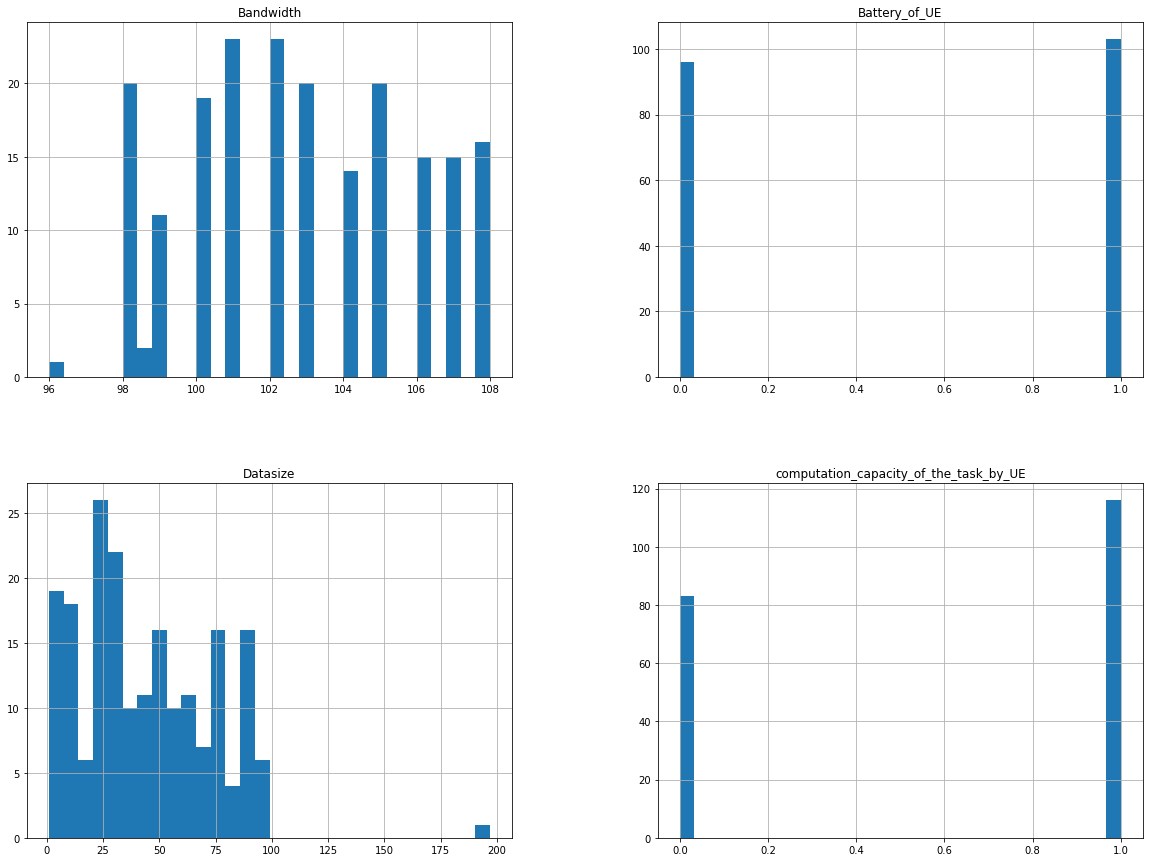

In [6]:
dataset.hist(bins=30, figsize=(20,15))

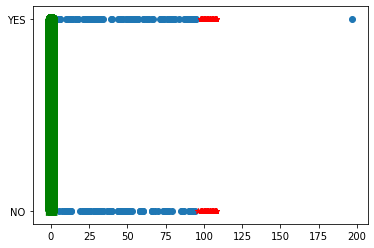

In [114]:
plt.scatter(dataset.Datasize, dataset.Prediction)
plt.plot(dataset.Bandwidth, dataset.Prediction, "r*")
plt.plot(dataset.computation_capacity_of_the_task_by_UE, dataset.Prediction, 'g', linewidth=10)
plt.scatter(dataset.Battery_of_UE, dataset.Prediction)
plt.show()

In [46]:
training_data = dataset.drop(['Prediction'], axis=1)
output_class = dataset.Prediction
output_values = output_value_finder(dataset.Prediction)
array = np.array(output_values)

## ML ALGOS

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
x_train,x_test, y_train,y_test = train_test_split(training_data, output_values, test_size=0.2, random_state=42)

### Linear Regression

In [21]:
lr = LogisticRegression(solver="saga", random_state=42, max_iter=700000, tol=0.00001)
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=700000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=1e-05, verbose=0,
                   warm_start=False)

In [22]:
print("Score of Accuracy in test data : {}%".format(lr.score(x_test, y_test)*100))

Score of Accuracy in test data : 42.5%


In [28]:
print("Predicted Value : {}".format(lr.predict([x_test.values[15]])[0]))
print("Actual Value is {}".format(y_test[15]))

if lr.predict([x_test.values[15]])[0] == y_test[15]:
    print("Great Model")

Predicted Value : 1
Actual Value is 1
Great Model


### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
print("Accuracy Score is {}%".format(d_tree.score(x_test, y_test)*100))

Accuracy Score is 57.49999999999999%


### KNeighborsClassifier Algorithm

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
x_train,x_test, y_train,y_test = train_test_split(training_data, output_class, test_size=0.2, random_state=42)

In [61]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(training_data, output_class)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
neigh.predict([x_test.values[12]])

array(['NO'], dtype=object)

In [64]:
y_test.values[12]

'NO'

In [67]:
print("Accuracy Score is {}%".format(neigh.score(x_test, y_test)*100))

Accuracy Score is 67.5%


### Naive Base Algorithm

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
naive = GaussianNB()
naive.fit(training_data, output_class)

GaussianNB(priors=None, var_smoothing=1e-09)

In [77]:
print("Accuracy Score is {}%".format(math.ceil(naive.score(x_test, y_test)*100)))

Accuracy Score is 58%


# Support vector Machine

In [78]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [80]:
s = SVC(C=5.0, gamma=0.22)
s.fit(training_data,output_class)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.22, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
print("Acuracy Score is {}%".format(s.score(training_data,output_class)*100))

Acuracy Score is 97.98994974874373%


In [89]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
r_forest = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=150)
r_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [100]:
print("Accuracy Score is {}%".format(r_forest.score(x_test, y_test)*100))

Accuracy Score is 55.00000000000001%
